In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0       

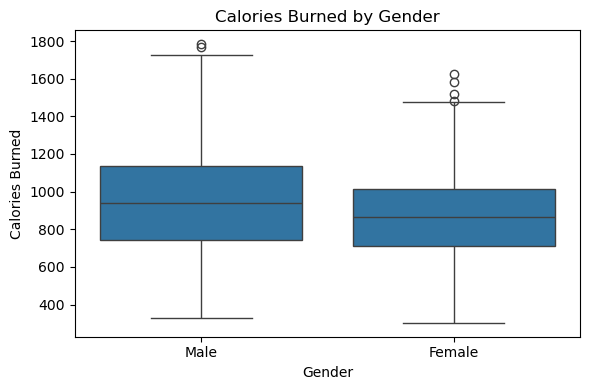

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=dataset_as_given, x='Gender', y='Calories_Burned')
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()


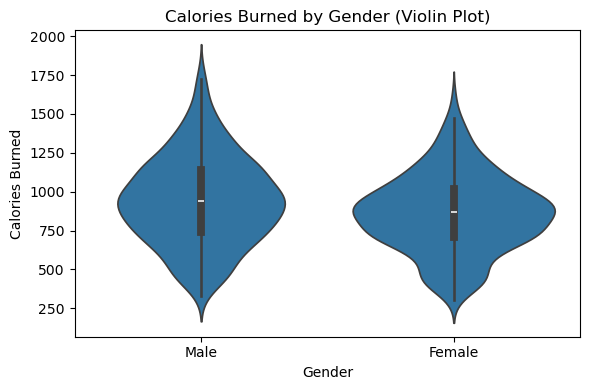

In [3]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=dataset_as_given, x='Gender', y='Calories_Burned', inner='box')
plt.title('Calories Burned by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()


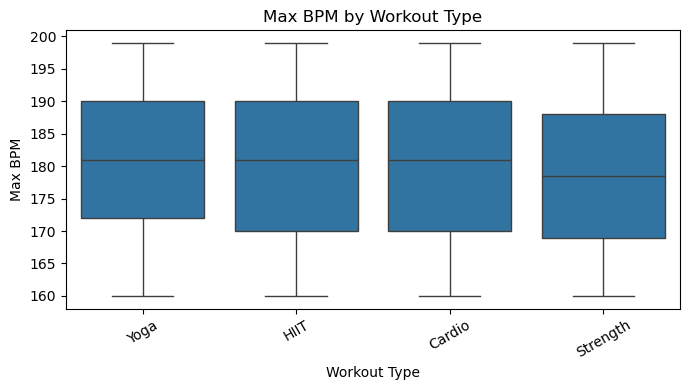

In [4]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=dataset_as_given, x='Workout_Type', y='Max_BPM')
plt.title('Max BPM by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Max BPM')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


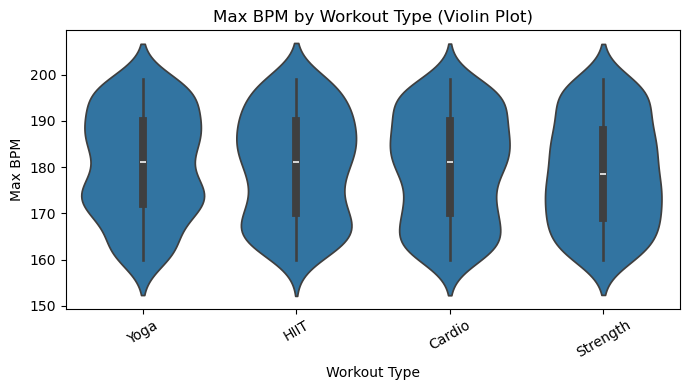

In [5]:
plt.figure(figsize=(7, 4))
sns.violinplot(data=dataset_as_given, x='Workout_Type', y='Max_BPM', inner='box')
plt.title('Max BPM by Workout Type (Violin Plot)')
plt.xlabel('Workout Type')
plt.ylabel('Max BPM')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


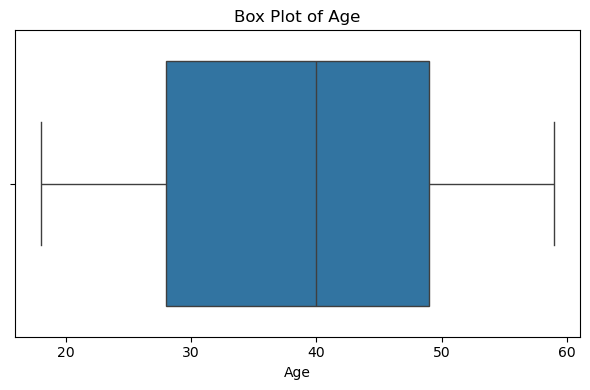

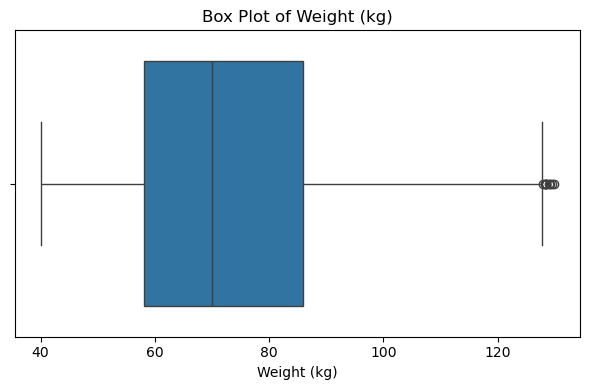

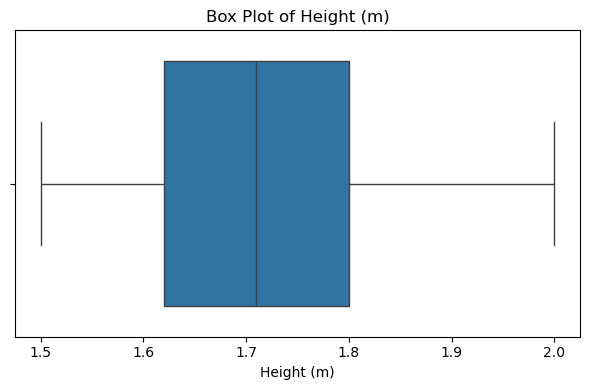

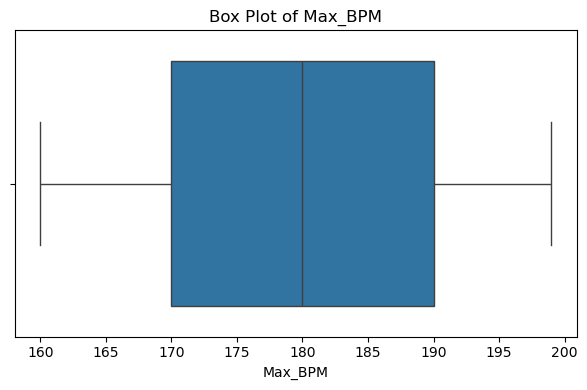

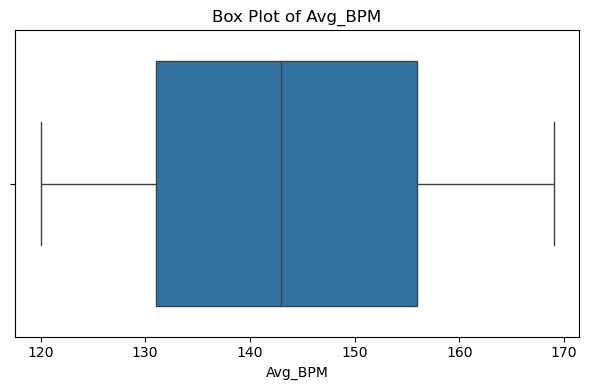

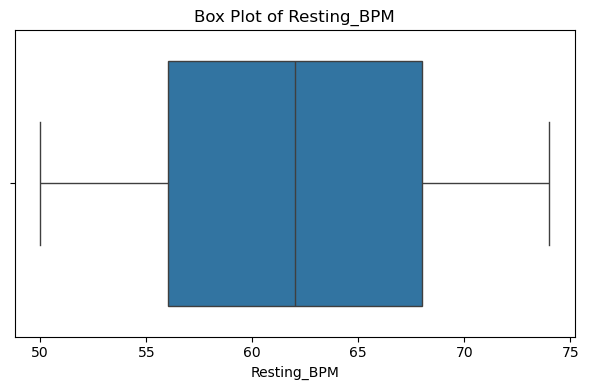

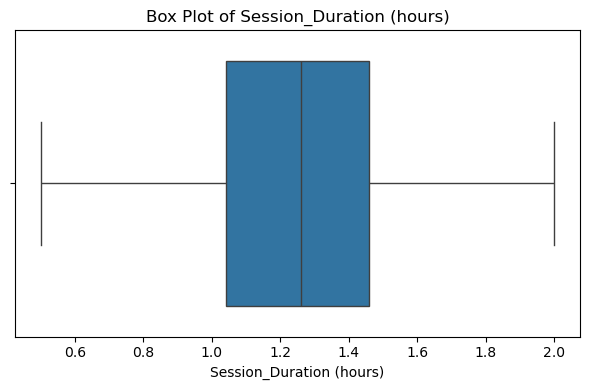

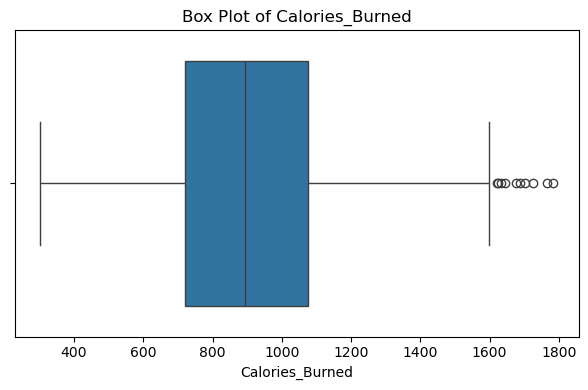

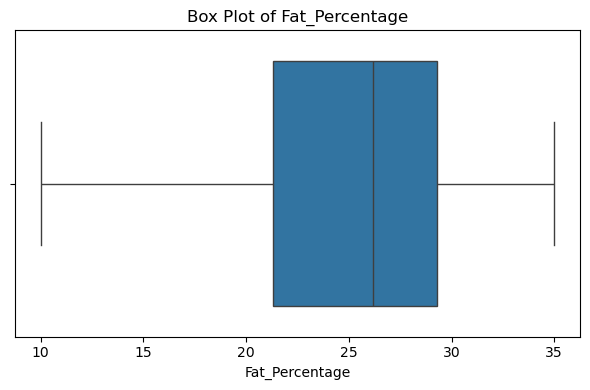

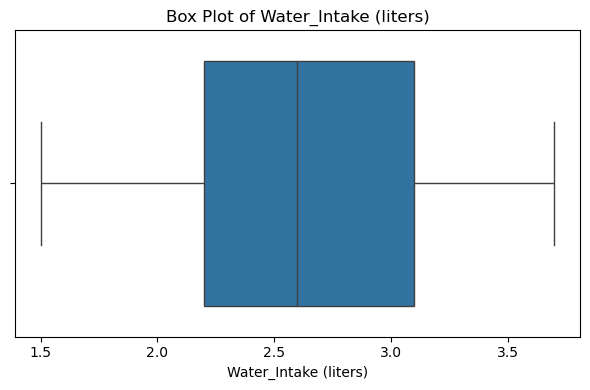

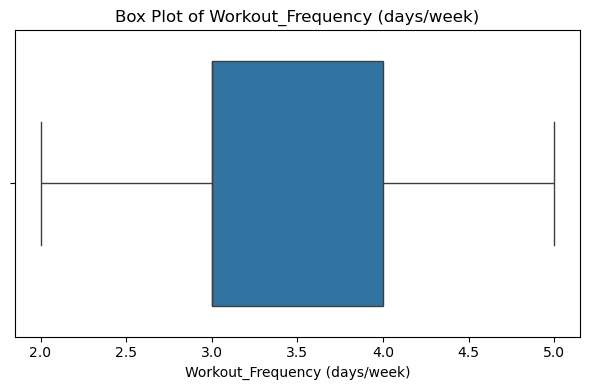

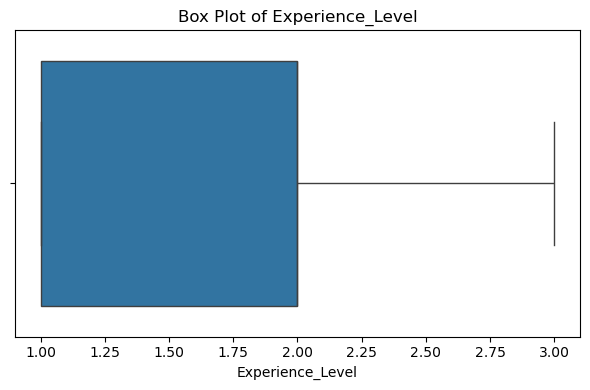

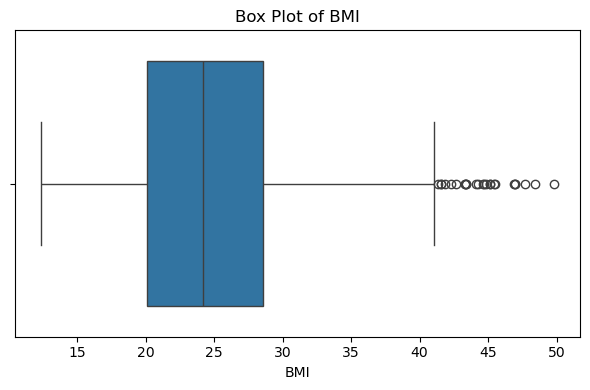

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = dataset_as_given.select_dtypes(include=['int64', 'float64']).columns

# Create a boxplot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataset_as_given[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [7]:
import pandas as pd

# Select numeric columns
numeric_cols = dataset_as_given.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = dataset_as_given[col].quantile(0.25)
    Q3 = dataset_as_given[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset_as_given[(dataset_as_given[col] < lower_bound) | 
                                (dataset_as_given[col] > upper_bound)][col]

    outlier_summary[col] = {
        'num_outliers': outliers.count(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_values': outliers.values
    }

# Display results
for col, info in outlier_summary.items():
    print(f"Column: {col}")
    print(f"  Number of outliers: {info['num_outliers']}")
    print(f"  Lower bound: {info['lower_bound']:.2f}")
    print(f"  Upper bound: {info['upper_bound']:.2f}")
    print()


Column: Age
  Number of outliers: 0
  Lower bound: -3.50
  Upper bound: 80.50

Column: Weight (kg)
  Number of outliers: 9
  Lower bound: 16.25
  Upper bound: 127.85

Column: Height (m)
  Number of outliers: 0
  Lower bound: 1.35
  Upper bound: 2.07

Column: Max_BPM
  Number of outliers: 0
  Lower bound: 140.00
  Upper bound: 220.00

Column: Avg_BPM
  Number of outliers: 0
  Lower bound: 93.50
  Upper bound: 193.50

Column: Resting_BPM
  Number of outliers: 0
  Lower bound: 38.00
  Upper bound: 86.00

Column: Session_Duration (hours)
  Number of outliers: 0
  Lower bound: 0.41
  Upper bound: 2.09

Column: Calories_Burned
  Number of outliers: 10
  Lower bound: 186.00
  Upper bound: 1610.00

Column: Fat_Percentage
  Number of outliers: 0
  Lower bound: 9.30
  Upper bound: 41.30

Column: Water_Intake (liters)
  Number of outliers: 0
  Lower bound: 0.85
  Upper bound: 4.45

Column: Workout_Frequency (days/week)
  Number of outliers: 0
  Lower bound: 1.50
  Upper bound: 5.50

Column: Exper

Using the interquartile range (IQR) method, it was found that several numerical columns in the dataset contain outliers.<br>